In [1]:
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt

In [2]:
image_folder = '/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames/raw-footage/observation088/APR08_2018_A_DJI_0005' 
image_files = glob.glob(image_folder + '/*.jpg')
image_files.sort(key = lambda file: int(file.split('.')[-2].split('_')[-1]))
print(len(image_files))
print(image_files[:5])

6693
['/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames/raw-footage/observation088/APR08_2018_A_DJI_0005/APR08_2018_A_DJI_0005_6246.jpg', '/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames/raw-footage/observation088/APR08_2018_A_DJI_0005/APR08_2018_A_DJI_0005_6248.jpg', '/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames/raw-footage/observation088/APR08_2018_A_DJI_0005/APR08_2018_A_DJI_0005_6250.jpg', '/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames/raw-footage/observation088/APR08_2018_A_DJI_0005/APR08_2018_A_DJI_0005_6252.jpg', '/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames/raw-footage/observation088/APR08_2018_A_DJI_0005/APR08_2018_A_DJI_0005_6254.jpg']


0 frames processed


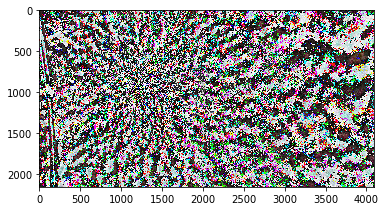

In [3]:

warps = [np.eye(3)]
total_warp = warps[-1]
    
    


def calculate_transform(im1, im2, past_warp):
    warp_matrix = cv2.estimateRigidTransform(im1, im2, fullAffine=False) 
    warp_matrix = np.vstack((warp_matrix, np.array([0,0,1])))
    combined_warp = np.matmul(past_warp, warp_matrix)
    return warp_matrix, combined_warp

frame_count = 0

last_frame = None
first_frame = None

for image_ind, image_file in enumerate(image_files[:1000]):
    frame = plt.imread(image_file)
#     if image_ind % 5 == 0:
#         plt.figure()
#         plt.imshow(frame)

    if frame_count % 5000 == 0:
        print(frame_count, 'frames processed')


    if not last_frame is None:
        warp, total_warp = calculate_transform(last_frame, frame, total_warp)
        warps.append(warp)
    last_frame = frame

    frame_count += 1
    
    if first_frame is None:
        first_frame = np.copy(frame)
plt.imshow(frame - first_frame)




In [4]:
warped_im = cv2.warpAffine(frame, total_warp[:2], (frame.shape[1], frame.shape[0]),  flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)

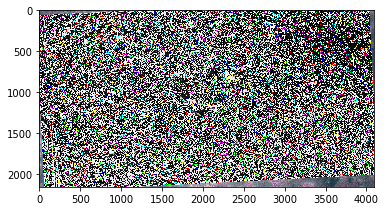

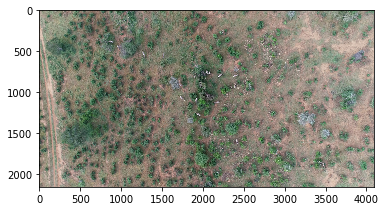

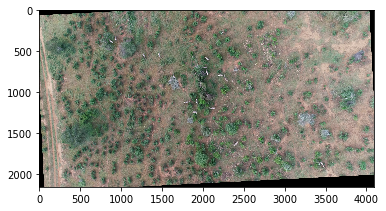

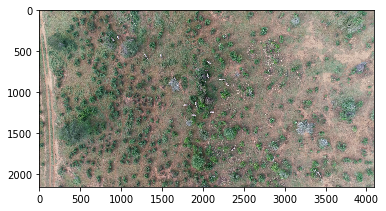

In [5]:
plt.imshow(warped_im - first_frame)
plt.figure()
plt.imshow(first_frame)
plt.figure()
plt.imshow(warped_im)
plt.figure()
plt.imshow(frame)

In [7]:
t_warp = np.eye(3)
print(len(warps))
for ind in range(len(warps)):
    t_warp = np.matmul(t_warp, warps[ind])

1000


In [8]:
print(t_warp - total_warp)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [9]:
drone_movement_list_raw = np.load('/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/processed-videos/raw-footage/observation088/drone_movement.npy')
print(len(drone_movement_list_raw))
drone_movement_list = [drone_movement_list_raw[0]]
for step in range(int((len(drone_movement_list_raw) - 1) / 2)):
    drone_movement_list.append(np.matmul(drone_movement_list_raw[step * 2 + 1], drone_movement_list_raw[(step + 1) * 2 ]))
print(len(drone_movement_list))

228259
114130


In [10]:
n_warp = np.eye(3)
print(len(warps))
for ind in range(len(warps)):
    n_warp = np.matmul(n_warp, drone_movement_list[ind])

1000


In [11]:
print(total_warp - n_warp)

[[-2.89579947e-01  1.94197052e-01  6.46702225e+02]
 [-1.94197052e-01 -2.89579947e-01 -2.01795826e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [3]:
import numpy as np
np.array([[1,2,3],[4,5,6]]).shape

(2, 3)